In [47]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Flatten, Input, Dense, Conv2D, Conv2DTranspose,AveragePooling2D, Reshape, MaxPooling2D,UpSampling2D,LeakyReLU, concatenate, Dropout,BatchNormalization,Activation,ReLU
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import random

from sklearn.decomposition import IncrementalPCA

In [48]:
import cv2
import matplotlib.pyplot as plt
# Garbage Collector - use it like gc.collect()
import gc
import tensorflow as tf

In [49]:
img_dim = 256
def input_target_split():
    train = []
    images_list = os.listdir('/content/drive/MyDrive/agri_images')
    for index in range(len(images_list)):
        images_path = os.path.join('/content/drive/MyDrive/agri_images',images_list[index])
        if(images_path == '/content/drive/MyDrive/agri_images/s2'):
          break
        image = load_img(os.path.join(images_path), target_size=(img_dim,img_dim)) 
        image = img_to_array(image)
        image = image/255.0
        train.append(image)
    return np.array(train)

In [50]:
x = input_target_split()

In [51]:
datagen = ImageDataGenerator(rotation_range=90,width_shift_range=0.3,height_shift_range=0.3,zoom_range=[0.5, 1.5],horizontal_flip=True,vertical_flip=True)
datagen.fit(x)

In [52]:
pretrained_model=ResNet50(weights="imagenet", include_top=False, input_shape=(256,256,3))


In [53]:
# pretrained_model.summary()

In [54]:
def CAE():
    input_shape = (256, 256, 3)
    last_layer = pretrained_model.output
    set_trainable = False
    for layer in pretrained_model.layers:
        if layer.name in ['conv2d']:
            set_trainable = True
        if layer.name in ['max_pooling2d','max_pooling2d_1','average_pooling2d ','average_pooling2d_1','average_pooling2d_2','max_pooling2d_2','average_pooling2d_3','average_pooling2d_4','average_pooling2d_5','average_pooling2d_6','max_pooling2d_3','average_pooling2d_7','average_pooling2d_8',]:
            layer.trainable = False
    encoder_model = layers.Flatten()(last_layer)
    encoder_model = layers.Dense(2048*2, kernel_initializer="glorot_uniform",activation='relu')(encoder_model)
    encoder_model = layers.Dense(100, kernel_initializer="glorot_uniform", name='embedding')(encoder_model)  
    
    model_decoder = layers.Conv2DTranspose(512,(3,3),strides=(2, 2),padding='same')(last_layer)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder) 
    
    model_decoder = layers.Conv2D(512,(3,3),strides=(1, 1),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder)
    
    model_decoder = layers.Conv2DTranspose(256,(3,3),strides=(2, 2),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder) 
    
    model_decoder = layers.Conv2D(256,(3,3),strides=(1, 1),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder)
    
    model_decoder = layers.Conv2DTranspose(128,(3,3),strides=(2, 2),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder) 
    
    model_decoder = layers.Conv2D(128,(3,3),strides=(1, 1),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder)
    
    model_decoder = layers.Conv2DTranspose(64,(3,3),strides=(2, 2),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder) 
    
    model_decoder = layers.Conv2D(64,(3,3),strides=(1, 1),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder)
    
    model_decoder = layers.Conv2DTranspose(64,(3,3),strides=(2, 2),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder)
    model_decoder = layers.Conv2D(3,(3,3),strides=(1, 1),padding='same')(model_decoder)
    model_decoder = layers.LeakyReLU(0.1)(model_decoder)
    model_decoder = layers.BatchNormalization()(model_decoder)
    
    model_decoder = Model(pretrained_model.input,model_decoder)
    model_encoder = Model(pretrained_model.input,encoder_model)
    model_encoder.summary()
    model_decoder.summary()
    return model_decoder , model_encoder

In [55]:
"""import tensorflow as tf
autoencoder.load_weights("./model_5.h5")"""

'import tensorflow as tf\nautoencoder.load_weights("./model_5.h5")'

In [56]:
gc.collect()

68124

In [57]:
autoencoder,encoder = CAE()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [58]:
autoencoder.compile(optimizer = Adam(learning_rate=0.001), loss = ['mse'], metrics=['accuracy'])

In [59]:
gc.collect()

8381

In [60]:
autoencoder.fit_generator(datagen.flow(x,x,batch_size=16),epochs=200, steps_per_epoch=20)
autoencoder.save_weights('model_auto.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/200
20/20 [==============================] - 10s 232ms/step - loss: 1.0227 - accuracy: 0.3006
Epoch 2/200
20/20 [==============================] - 6s 272ms/step - loss: 0.9533 - accuracy: 0.2196
Epoch 3/200
20/20 [==============================] - 5s 246ms/step - loss: 0.9065 - accuracy: 0.2747
Epoch 4/200
20/20 [==============================] - 5s 231ms/step - loss: 0.8617 - accuracy: 0.3285
Epoch 5/200
20/20 [==============================] - 5s 233ms/step - loss: 0.8130 - accuracy: 0.3967
Epoch 6/200
20/20 [==============================] - 5s 233ms/step - loss: 0.7717 - accuracy: 0.4158
Epoch 7/200
20/20 [==============================] - 5s 233ms/step - loss: 0.7396 - accuracy: 0.3665
Epoch 8/200
20/20 [==============================] - 5s 232ms/step - loss: 0.7047 - accuracy: 0.4357
Epoch 9/200
20/20 [==============================] - 5s 233ms/step - loss: 0.6693 - accuracy: 0.3819
Epoch 10/200
20/20 [==============================] - 5s 232ms/step - loss: 0.6247 - accur

In [61]:
gc.collect()

50

In [62]:
autoencoder.load_weights('./model_auto.h5')

In [63]:
import keras.backend as K
import tensorflow.keras.utils
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Layer, InputSpec

class ClusteringLayer(Layer):
    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(input_dim, self.n_clusters), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1))
        return q
      
    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [64]:
clustering_layer = ClusteringLayer(100, name='clustering')(encoder.output)
clustering_model = Model(inputs=encoder.input, outputs=clustering_layer)
clustering_model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))

In [66]:
clustering_model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [67]:
gc.collect()

24519

In [68]:
y_pred

array([ 0,  0,  0, 79,  0,  0, 35, 32,  0, 83, 74, 29, 74,  4, 79, 45,  0,
       79, 79,  0,  0, 57, 74, 74, 30,  0,  0,  0,  0,  0, 45,  0, 60, 59,
        0,  0, 79,  0, 30,  0, 85,  0,  0, 79, 57,  0, 79, 70, 79, 74, 85,
       79,  0, 74, 54,  0,  7, 79, 14, 85,  0, 41,  0, 60,  0, 30, 91, 92,
       82, 30,  0, 69, 79, 35,  0,  4,  0,  0, 13, 74, 85, 15, 74,  0, 79,
        0, 50,  5, 79, 33,  0, 12, 30,  8, 19, 79, 74, 79, 59, 46,  0,  8,
        0, 33, 91,  0, 17, 79,  0, 89,  0, 79, 54, 30, 39,  0,  8, 29, 79,
        0, 92, 77,  0,  4,  0,  0, 79, 13, 30,  0, 85,  0,  0, 74, 35, 79,
        0, 79,  0, 74,  0,  0,  0,  7, 79, 35, 79,  0, 79,  0,  0,  0,  0,
        5, 79, 56,  0, 60, 47, 23,  0, 79, 31, 79, 79,  0,  0,  0,  0, 35,
       13,  9, 79, 29,  0, 79,  7, 30, 14,  0, 74, 54,  0, 73,  0,  0, 39,
        0, 79, 74,  0, 36, 33, 60,  0, 79,  0, 13, 46,  0,  0,  0,  0, 79,
       33, 79,  8,  0, 17,  0,  0,  0,  0,  0, 60, 31, 79,  0, 35, 74,  0,
        0, 13, 79,  2,  0

In [69]:
"q = clustering_model.predict(x, verbose=0)"

'q = clustering_model.predict(x, verbose=0)'

In [70]:
"p = target_distribution(q)  # update the auxiliary target distribution p"

'p = target_distribution(q)  # update the auxiliary target distribution p'

In [71]:
"y_pred = q.argmax(1)"

'y_pred = q.argmax(1)'

In [72]:
"y_pred"

'y_pred'

In [73]:
gc.collect()

300

In [74]:
"""for i in range(100):
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss =clustering_model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0
    gc.collect()
print(loss)"""

'for i in range(100):\n    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]\n    loss =clustering_model.train_on_batch(x=x[idx], y=p[idx])\n    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0\n    gc.collect()\nprint(loss)'

In [75]:
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [76]:
loss = 0
index = 0
maxiter = 10000
update_interval = 100
index_array = np.arange(x.shape[0])
batch_size = 16

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


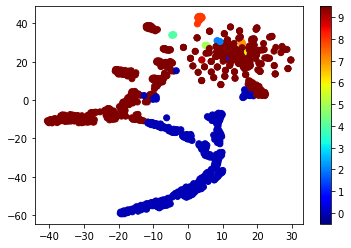

prediction  [ 0  0  0 79  0  0 35 32  0 83 74 29 74  4 79 45  0 79 79  0  0 57 74 74
 30  0  0  0  0  0 45  0 60 59  0  0 79  0 30  0 85  0  0 79 57  0 79 70
 79 74 85 79  0 74 54  0  7 79 14 85  0 41  0 60  0 30 91 92 82 30  0 69
 79 35  0  4  0  0 13 74 85 15 74  0 79  0 50  5 79 33  0 12 30  8 19 79
 74 79 59 46  0  8  0 33 91  0 17 79  0 89  0 79 54 30 39  0  8 29 79  0
 92 77  0  4  0  0 79 13 30  0 85  0  0 74 35 79  0 79  0 74  0  0  0  7
 79 35 79  0 79  0  0  0  0  5 79 56  0 60 47 23  0 79 31 79 79  0  0  0
  0 35 13  9 79 29  0 79  7 30 14  0 74 54  0 73  0  0 39  0 79 74  0 36
 33 60  0 79  0 13 46  0  0  0  0 79 33 79  8  0 17  0  0  0  0  0 60 31
 79  0 35 74  0  0 13 79  2  0 33 73 11  0 60 79 74  0 79  0 25  0 79 67
 79 39 59  0 74  0  0  8 18 79 79 79 79  0 45 58 79 49 79  0 79  0 60  0
 79  0 60  0  0 79  0 74  0  0 60 33  0  0  0 25 79  0 74 74 45  0 79 79
 22 94 79  0  0 13  0  0  2  0 74  0 33  0 79  0 79 35  0  0 74  0 79 79
  0  0 42 58 79  0  0 12 32 17 45 79 79

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


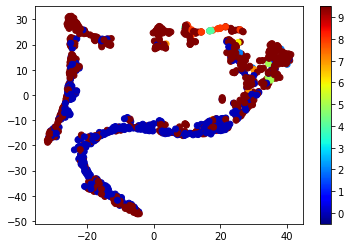

prediction  [ 0  0  0  0  0  0  0  0  0  0  0  0  0 30  0  0  0 79 33  0  0  0  0  0
  4  0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0 79 60  0 79  0
  0  0  0  0  0  0 54  0  0  0  0  0  0  0  0 79  0 79  0 18 82 30  0  0
 79  0  0 30  0  0 13  0  0  0  0  0  0  0 60  0  0 33  0  0 60  8  0  0
  0  0  0 74  0  4  0 79  0  0 79  0  0  0  0 79 54 79  0 79  8  0 79  0
 92 74  0  4  0  0 79 30  0  0  0  0  0  0  0 79  0 79  0  0  0  0  0 60
 79  0 79  0  0  0  0  0  0  0  0  0  0 79 74  0  0  0  0  0  0  0 79  0
  0  0 30  0  0  0  0 79  0 33  0  0  0 33  0  0  0  0  0  0  0  0  0  0
 79 79  0  0  0 33  0  0  0  0  0  0 79  0 54  0  0  0  0  0  0  0  0  0
 79  0  0  0  0  0 60  0 74  0 79  0  0  0  0  0  0  0  0  0  0  0 79  0
 79  0  0  0  0  0  0 54 18 79  0 79  0  0  0  0  0  0  0  0 79  0 79  0
  0  0  0  0  0  0  0  0  0  0  0 79  0  0  0  0 79  0  0  0  0  0 79  0
  0  0  0  0  0 33  0  0  0  0  0  0 33  0  0  0 79  0  0  0  0  0 79  0
  0  0  0  0  0  0  0  0  0  0  0  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


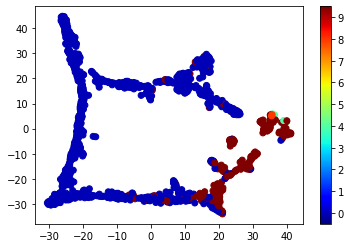

prediction  [ 0  0 79 79  0  0  0  0  0  0 79  0  0 26 79  0 79 33 92  0 79  0  0  0
 26  0  0  0  0  0  0 79 33  0  0  0 79  0 18  0  0 79  0 33 79 79 79 74
 79  0  0 79  0 79 92  0  0 79 74  0  0 74  0 33  0 13  0 18 82  8  0  0
 33 60  0 26 79 79 18  0  0  0 79  0 79 79 60  0 79 54 79 74 13 82 74 79
  0 79  0  0 79 48  0 33  0 79 33 79 79  0  0 33 92 13  0 33 82  0 54 79
 18 74 79 48  0  0 33 26 13  0  0 79  0 79  0 33 79 33 79  0  0 79 79 30
 79  0 54  0 79 79 79 79  0  0 79  0  0 30 74  0  0 33  0  0 79  0 79  0
 60  0  8  0 79  0 79 33  0  8 74  0  0 54 79  0 79 79  0  0 79  0 79 60
 33 60  0 79 79  8 74 79 79 79 79 79 33 33 26 79 74 79 79  0  0  0 33 74
 79  0  0  0  0  0  8 79 74  0 54  0 74 79 33 79  0  0 79 79  0 79 33  0
 33 74  0  0  0 79 79 18 18 33 79 33 79  0  0 74 79 74 33 79 33  0 33  0
 79  0 33  0  0 33  0  0  0  0 13 33 79 79 79 30 33  0  0  0  0 79 79 79
  0 74 79  0  0  8  0 79  0  0  0 79 54  0 79  0 33  0  0 79  0  0 33 79
  0 79  0  0 79  0  0  0  0  0  0 79 60

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


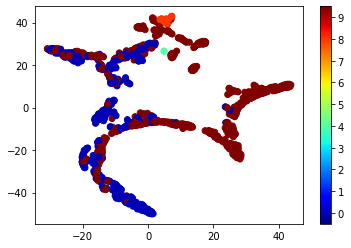

prediction  [ 0 79  0  0  0  0  0  0  0  0  0  0 74  8 79 74  0 33 92  0 79  0  0  0
  8  0  0  0  0  0  0  0 33  0  0  0  0  0  8  0 74  0  0 79 60 79 79 74
 79  0 74 79  0 79 18  0  0 79 74 74  0 74  0 33  0 13  0 54 82  8  0  0
 33  0  0 26  0  0 18 74  0  0 79  0 79  0 30  0 79 54 79 74 13 48  0  0
  0  0  0 74 79 48  0 33  0  0 33  0 79  0  0 33 92 13  0 33 82  0 54  0
 18 74 79 48  0  0 33 26 30  0  0 79  0  0  0 33 79 33 79  0  0 79 79 30
 79 74 54  0  0  0 79  0  0 74 60 74  0 33 74  0  0 79 74  0 79  0 79  0
  0  0 26  0  0  0 79 33  0  8 74  0 74 54 79  0 79 79 74  0  0 74  0 74
 33 60  0 79 79  8  0  0 79  0  0 33 33 33 82  0 74  0 79  0  0  0 79 74
 79  0  0  0 74  0  8 79 74  0 54  0 74  0 79  0 74  0 79  0  0  0 33  0
 33 74 74  0  0  0  0 82 82 33 79 33  0  0  0 74  0 74 33  0 33  0 33  0
 79  0 79  0  0 79  0  0  0  0 13 54 79 79  0 60 33  0  0  0 74  0 79 79
 60 74 79  0  0  8  0  0 74  0  0  0 54  0 79 74 79 74  0  0  0  0 54  0
  0  0 74  0 79  0  0  0 74  0 74 79 60

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


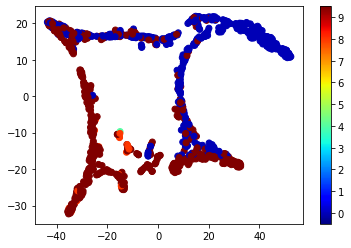

prediction  [ 0 79 79  0  0  0  0  0  0  0  0  0 74 60 79 74  0 33 54  0  0  0  0  0
 30  0  0  0  0  0  0 79 79  0  0  0 79  0 33  0 74 79  0  0  0 79 79 74
 79  0 74 79  0  0 54  0  0 33  0 74  0 35  0 33  0 79  0  0 92 30  0 74
 33  0  0 30  0 79 54 74  0  0  0  0 79 79  0 74 33 79 79  0 79  8  0 79
  0 79 74 74 33  8  0 33  0  0 79  0  0  0  0 33 54 79  0 79  8  0 33 79
 92 74 79  8  0  0 33 30 79  0  0 79  0  0  0 33 79 33 79  0  0 33 79  0
 79 74 33  0 79  0 79 79  0 74  0  0  0 33 74  0  0 79 74 79 79  0 79  0
  0  0 60  0  0  0  0 33 74 79 74  0 74 33 79  0 79 79  0  0 79  0 79 74
 33 33  0 33 79 33  0  0 79  0  0 33 33 79 30  0 74  0 79  0  0  0 79 74
 79  0 74  0 74  0 79 79 74  0 54  0 74  0 79  0 74  0 79 79  0 79 79  0
 33 74 74  0  0 79  0 33 92 33 79 79  0  0  0 74  0 74 33  0 33 74 79  0
  0  0 79 79  0 33  0  0  0 79 79 54 79 33 79  0 33 74  0  0 74 79 79 79
  0 35 33  0  0 54  0  0 74  0  0  0 33  0 33 74 33 74  0 79  0  0 33 79
  0 79  0  0 79  0  0  0 74  0 74 79  0

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


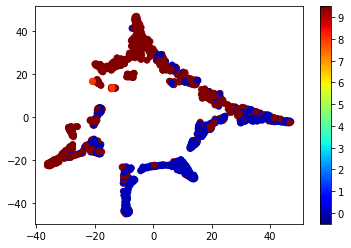

prediction  [ 0 33 54 33 33 79 74  0  0  0  0  0  0 30 54 74 33 54 54 79 33  0  0  0
 30 33  0 33 79 79  0 33 54  0 33  0 54 33 92 33 74 33 79 79  0 54 54 74
 33  0  0 33  0 79 92 33  0 54 59 74 79 74 79 54 79 54 74 54 18 13 33 74
 54  0 33  8 33 33 92 74  0 59 79 79 33 33  0 74 54 33 33  0 30 92 59 33
  0 54  0 74 33 18 33 54  0 79 33 33 79  0 54 54 92 54  0 33 13 74 54 33
 18 74 33  8  0  0 54  8 33 79  0 33 33 79 79 54 33 54 33 74  0 54 33 79
 33  0 54 33 33 79 33 33 79 59 79 35  0 54 35 59 79 54 74 33 33 33 54 79
 79  0 30 35 33  0 33 54  0 54 59 33 74 54 33  0 33 33 74 79 33  0 33 74
 54 54 79 54 33 54  0  0 33 79 54 54 54 33 54 79 74 33 33  0 79  0 54 35
 54 33 74  0 74 79 54 33 74 79 92 79 74 54 54 54 74  0 33 33 74 54 33  0
 54 74 74  0  0 33 33 92 92 54 33 33 54 33  0 74 33 59 54 33 54  0 33 79
 33  0 54 33 33 54 33  0 79 33 30 92 33 54 33  0 54  0  0 74 74 33 33 54
 74 35 54  0  0 92 79 33 74 79  0 33 54 79 54 74 54 74  0 33  0  0 33 33
  0 54 74  0 54 33  0  0 74 74 74 33 79

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


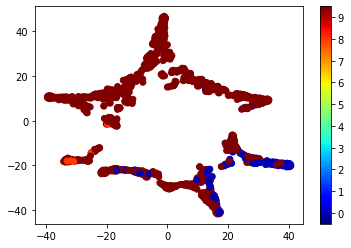

prediction  [74 33 33 33 79 33  0 74  0  0  0 74 74 13 54 74 33 54 54 79 33 35 74  0
  0 33 74 33 79 79  0 33 54  0 79  0 33 79 13 79 74 79 79 79 35 33 33 35
 33  0 74 33  0 79 92 33 74 33 17 74 79 74 79 54 79 13 74 54 18 13 79  0
 54  0 33  8 33 33 18 74  0 17 74 33 33 79 74 74 33 33 33 74 13  8 17 33
  0 33 74 74 54  8 79 54  0 79 79 33 33 74 33 33 92 30 74 33 18 74 54 79
 18 35 33  8  0  0 54  8 54  0  0 33 79 79 79 54 79 54 79  0  0 33 33 60
 33 74 54 79 33  0 33 79  0 74 79 17  0 54 35 17 33 33 74 33 33 79 33 79
 60  0 13 17 33 74 79 54 74 30 17 79 74 33 33  0 33 33 74 79 33 74 79 74
 54 54 79 33 33 13 74  0 33 79 33 54 54 33  8 33 35 33 79  0  0  0 30 35
 33 79 74  0 74 79  8 33 74 79 92 79 74 33 33 33 74  0 33 33 74 33 79 74
 54 35 74  0  0 33 33  8 18 54 33 33 33 79 74 35 33 17 54 33 54  0 33 79
 33  0 33 79 33 54 33  0 79 79 30 92 79 54 33 30 54 74 74 74 74 33 33 33
 35 35 33  0  0 92  0 33 74 79 74 79 33  0 54 74 33 74  0 79  0 79 33 33
 74 33 74 74 33 79  0 74 74 74 35 33 79

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


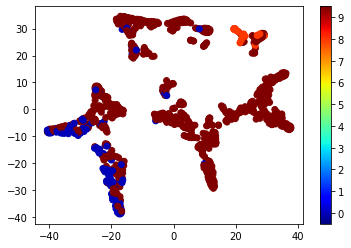

prediction  [74 74 79 33 79 33 74 74  0 74  0 79 74 30 54 35 79 33 33  0 79  0 74  0
 30 33 74 79 79 79 74 33 30 74 33  0 33 79 13  0 74 79  0 79  0 33 33  0
 33  0 74 33 74 79 54 33 74 33 35 74 74 35 74 33 33 13 74 92 18  4 79 74
 54 74 79 13 33 33  8 74 74  0 35 79 33 33  0 74 33 33 30  0 13  8  0 33
 74 33 74 85 33 13 79 54 74 79 74 33 74 74 79 54 92 54 35 33  8  0 54 79
 92 85 33 13 74 74 54 13 13  0  0 33 79  0 79 33 79 33 74 74  0 33 35 74
 33 74 33 33 33  0 33 79  0 35 33  0  0 30 35  0 79 33 74 33 30 33 79  0
 30  0 13  0 33 74 79 33 74 30 35 33 35 33 79  0 33 33 35 33 33 35  0 35
 54 30 79 33 33 30 74  0 33 79 33 33 33 33  8 33 35 33 79  0 79  0 30 35
 60 33 74 74 35 74 13 33 35 79 54 79 35 33 54 33 74 74 33 79 79 79  0 74
 33 35 74 74 74 60 33 13 18 33 33 33 33 79 74 85 33 74 33 33 33 74 33 74
 33 74 30  0 33 33 33  0 74 79 30 54 74 33 33 30 33 74 74 74 35 79 33 33
  0 35 79 74  0 13  0 33 74  0 35  0 30 74 33 74 33 35  0 79 35 79 33 33
 35 33 35 35 33  0 74  0 35 35 35 33 33

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


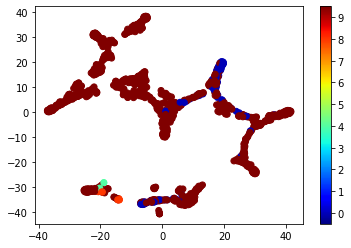

prediction  [74 33 79 79  0 79 74 35  0 74  0 35 74 30 33 35  0 33 33 79 79 17 74 74
 30 33 74  0 79 79 74 33 54 74 79  0 79 79 13 79 74 79  0  0 17 33 33 11
 33 74 74 79  0 79 92 33 35 33 20 35 74 85 74 33 33 13 35 92 18  4 79 74
 54  0 79  8 33 33  8 74 74 88 35 79 33 33 35 74 33 54 30 35 13  8 32 60
 74 79 74 85 33 13 79 54 74 79 35 33 79 74 79 33 54 13 35 33  8 35 54 79
 18 11 33 13 74 74 54  8 13  0  0 33  0  0 79 79 79 33 74 74  0 79 33 74
 79  0 54 33 79  0 79 79  0 91 60 11  0 30 85 64 79 33 35 33 33 79 79  0
 30  0 13 11 33 35 79 33 74 30 64 79 35 33 79  0 33 60 85 74 33 74  0 35
 54 30 79 33 33 13 35 60 33 60 33 33 33 33  8 33 35 33 79  0  0  0 30 35
 79 79 74 74 35  0 13 79 35 74 54  0 35 79 54 79 74 74 33 79 74 60  0 85
 33 85 74  0 74 60 33 13 18 33 79 33 54 79 74 85 33 88 33 30 33  0 33  0
 60 74 33 74 33 54 33  0 74 79 13 54 79 33 79 60 33 74 74 74 35  0 33 33
 91 85 79 74 74 13  0 33 35  0 35  0 30  0 33 74 33 35  0 79 35  0 33 33
 35 79 35 35 33  0 74 35 35 35 85 33 60

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


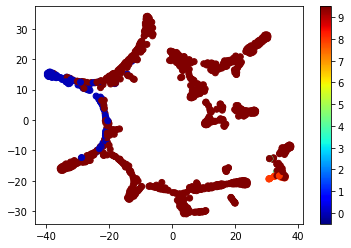

prediction  [74 35  0  0  0  0 74 35  0 35 74 74 74 30 33 35  0 33 33  0  0 35 74 74
 30 79 35  0 79 79 74 33 30 74 79  0  0  0 13 79 74  0  0  0 35 79 79 17
 79 74 74 79  0  0 92 33 74 33 17 35 74 35 35 79 33  8 35 18 18  8 79 74
 33 74 79 26 33 33  8 74 74 17 35 79 33 79 74 35 33 54 30 74  4  8 17 79
 74 79 74 85 33 13 79 54 74 79 85 33 74 35 79 33 54 13 35 33 13 35 54 79
 18 17 79  8 74 74 54  8 13  0  0 79  0  0 79 79  0 60 74 74  0  0 35 30
 79 74 54 79 79  0 74 79  0 17 60 17 74 30 91 17 79 60 35 33 60  0 79  0
 30  0 13 17 33 74 79 33 74 13 17  0 85 79 79  0 33 79 35 74 33 35  0 35
 13 30 79 33 33 13 74 60 79 60 60 33 33 33  8 79 35 79 79  0  0  0 79 35
 79 74 74 74 35 74 13 79 85 74 33 79 35 79 54  0 74 74 33 79 74  0 79 35
 60 85 74  0 74 79 33 13 18 79 79 33 54  0 35 91 60 17 33 33 79  0 79 74
 60 74 60 74 33 33 74  0 74  0 13 33 74 33  0 60 79 74 74 74 35  0 33 79
 17 91  0 74 74 13  0 79 35  0 35  0 30  0 79 74 79 85  0 79 35  0 54 33
 35  0 35 35 79  0 74 74 85 35 85 33 79

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


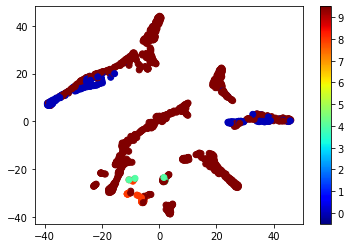

prediction  [17 35  0  0  0 74 35 35 74 35 35 35 35 30 33 35  0 79 33  0  0 45 35 74
 30 74 35  0  0 74 35 79 33 74  0 35  0  0 30 79 85  0  0  0 45  0 79 45
  0 74 35  0 74  0 92 79 35 79 32 85 74 85 17 79 33 13 91 18 18  4 79  0
 33 35 79  8 33 33  8 74 35 86 45 79 79 79 85 85 79 54 30 85 30 13 86 79
 35 33 35 45 33 13  0 33 35 79 45 79 85 35 79 33 54 30 35 33 13 85 54 79
 18 32 79  4 74 74 54  8 30  0  0 79  0  0 79  0  0 79 35 35  0  0 45 35
 79 35 35  0 79  0 35 79  0 32 79 32 74 60 32 64 79 79 45 79 79  0 79  0
  0  0 30 64 33 85 79 33 35 60 64  0 85 79  0 74 33 79 85 74 79 35  0 45
 33 30  0 79 79 30 17 60 79 79 79 33 33 33 13  0 85 79 74  0  0 35 79 45
  0 74 35 35 45 74 30 79 45 74 33  0 85  0 33  0 35 74 79  0 45  0  0 35
 79 45 85 74 35  0 79 13 18 74  0 79 33  0 35 45  0 64 33 79 79 74  0 74
  0 35 79 74 79 33 74  0 74 79 60 33 74 79 74 35 79 35 85  0 35  0 33 79
 45 45 79 74 74 30  0  0 85  0 85 74 60  0 79 17  0 45  0 79 35  0 33 79
 85 79 35 85  0  0 35 85 85 85 45 79 79

KeyboardInterrupt: ignored

In [77]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = clustering_model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p
        gc.collect()

        from sklearn.manifold import TSNE
        x_embedded = TSNE(n_components=2).fit_transform(p)
        vis_x = x_embedded[:, 0]
        vis_y = x_embedded[:, 1]
        plt.scatter(vis_x, vis_y, c=y_pred, cmap=plt.cm.get_cmap("jet", 256))
        plt.colorbar(ticks=range(256))
        plt.clim(-0.5, 9.5)
        plt.show()
        # evaluate the clustering performance
        y_pred = q.argmax(1)
        print("prediction ",y_pred)
        print("iter ",ite," loss ",loss)
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss =clustering_model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0
    gc.collect()

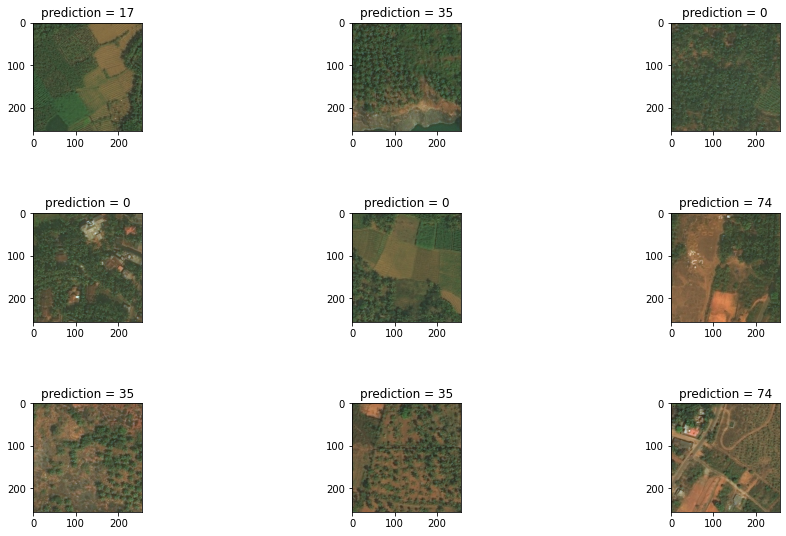

In [80]:
plt.figure(figsize = (15,9))
n = 0
for i in range(9):
    n += 1
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace = 0.75, wspace = 0.6)
    plt.imshow(x[n])
    plt.title("prediction = "+str(y_pred[i]))